In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'   ##QUALITY FIGURES!!

## Degrees in Telecommunications Engineering, group 95
## Modern Theory of Detection and Estimation
### Fall 2022

&nbsp;
&nbsp;
&nbsp;
# Review of Gaussian Statistics 

&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />



# Review of Gaussian probability density functions
## 1 dimensional case: 
$x \sim \mathcal N(m,\sigma^2)$ follows
$$
f(x|m,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-m)^2}{2\sigma^2}\right)
$$

where the two parameters of the pdf are:
- $m$ mean of the r.v, $m=\mathbb E\{x\}$
- $\sigma$: standard deviation, therefore $\sigma^2$ is the variance
$$
\sigma^2 = \mathbb E\{x^2\} - m^2
$$ 

The example shows 4 Gaussian pdfs with different mean and variances.

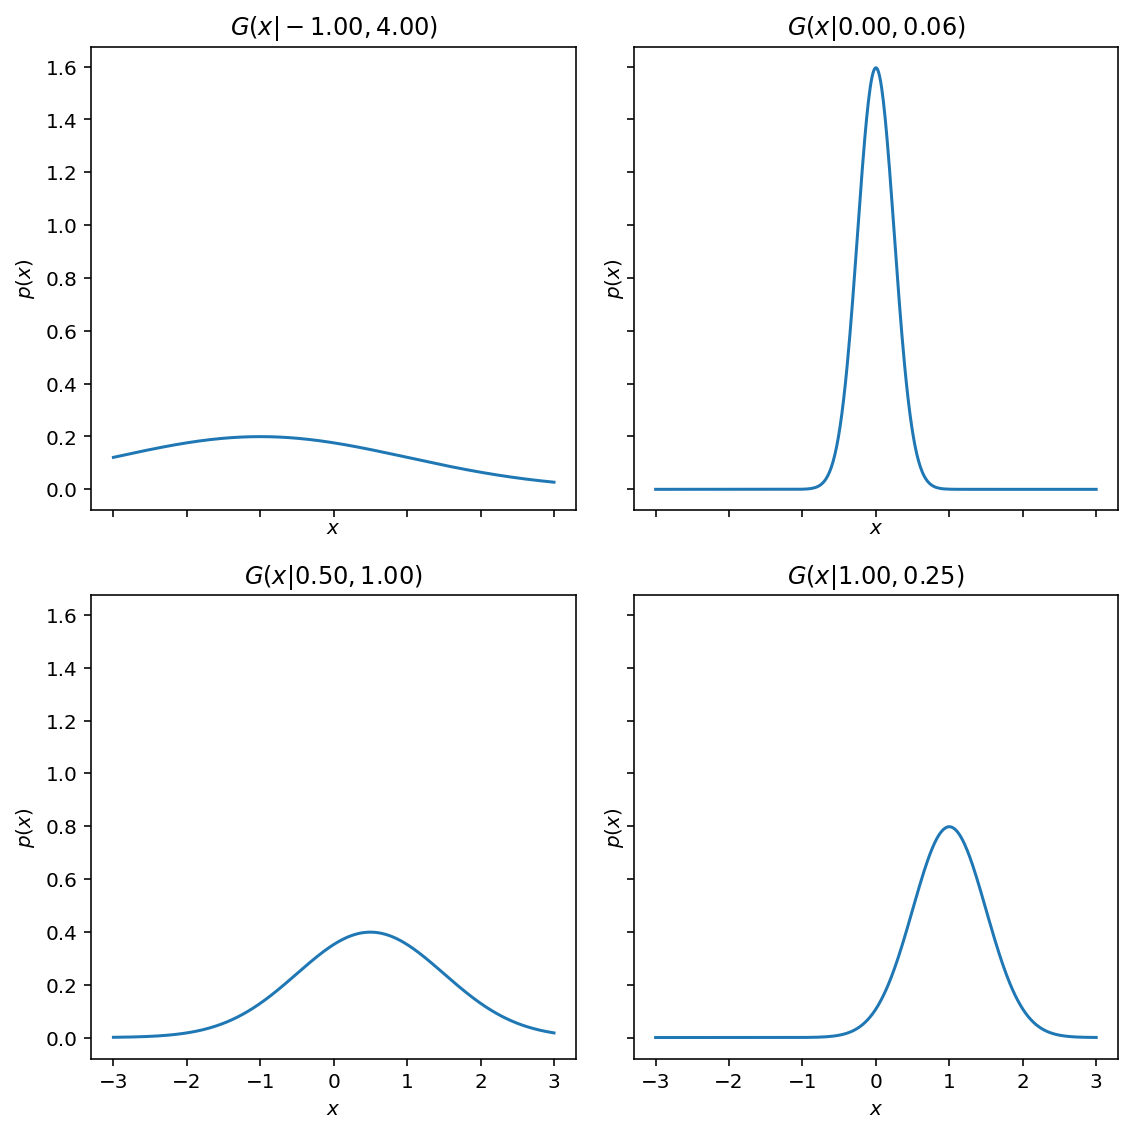

In [4]:
from scipy.stats import norm
ncol=2
nrow=2
v_m = [-1,0,0.5,1]
v_s = [2, 0.25, 1, 0.5]
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow),sharex=True, sharey=True)

x=np.linspace(-3,3,500)
kk = 0
for rr in range(nrow):
  for cc in range(ncol):
    ak = aa[rr][cc]
    ak.plot(x, norm.pdf(x, loc=v_m[kk], scale=v_s[kk]))
    ak.set_title('$G(x|{0:.2f},{1:.2f})$'.format(v_m[kk], v_s[kk]**2))
    ak.set_xlabel('$x$')
    ak.set_ylabel('$p(x)$')
    kk += 1

ff.tight_layout()

## d-dimensional case: 
$\mathbf x \sim \mathcal N(\mathbf m,\Sigma)$ follows
$$
f(\mathbf x|\mathbf m,\Sigma) = \frac{1}{\sqrt{(2\pi)^d|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf x-\mathbf m)^\top \Sigma^{-1}(\mathbf x-\mathbf m) \right)
$$

The parameters of the distribution are:
- $\mathbf m$ mean of the random vector $\mathbf x$,
- $\Sigma$ covariance matrix. The elements in the diagonal of $\Sigma$ are the variances of the components of the vector. The elements in the off-diagonal positions of $\Sigma$ are the covariances
- $|\Sigma|$ is the **determinant** of $\Sigma$ 
- $\Sigma^{-1}$ is the **inverse** of $\Sigma$

In [5]:
from scipy.stats import multivariate_normal
def draw_Gauss_2d(ax, xmin=-1, xmax=1, ymin=-1, ymax=1, m=np.zeros(2), S=np.eye(2)):
  npoints=100
  Xg = np.linspace(xmin-.05*np.absolute(xmin),
                   xmax + .05*np.absolute(xmax),
                   npoints) # or whatever values for x
    
  Yg = np.linspace(ymin-.05*np.absolute(ymin),
                   ymax + .05*np.absolute(ymax),
                   npoints)   # or whatever values for y
  X, Y = np.meshgrid(Xg, Yg)
  Xshape = X.shape
    
  x_test = np.hstack((X.reshape(-1,1), Y.reshape(-1,1)))
  rv = multivariate_normal(m, S)
  zz = rv.pdf(x_test)
  zz = zz.reshape(Xshape)
  return ax.contourf(X, Y, zz, alpha=0.2, cmap='PuOr')

Gaussian: 0
Mean
[0, 0]
Covariance
[[1. 0.]
 [0. 1.]]

Gaussian: 1
Mean
[-0.5, -0.5]
Covariance
[[3, 0], [0, 1]]

Gaussian: 2
Mean
[-0.5, 1]
Covariance
[[1, 0.8], [0.8, 1]]

Gaussian: 3
Mean
[0.5, 0.5]
Covariance
[[1, -0.85], [-0.85, 1]]



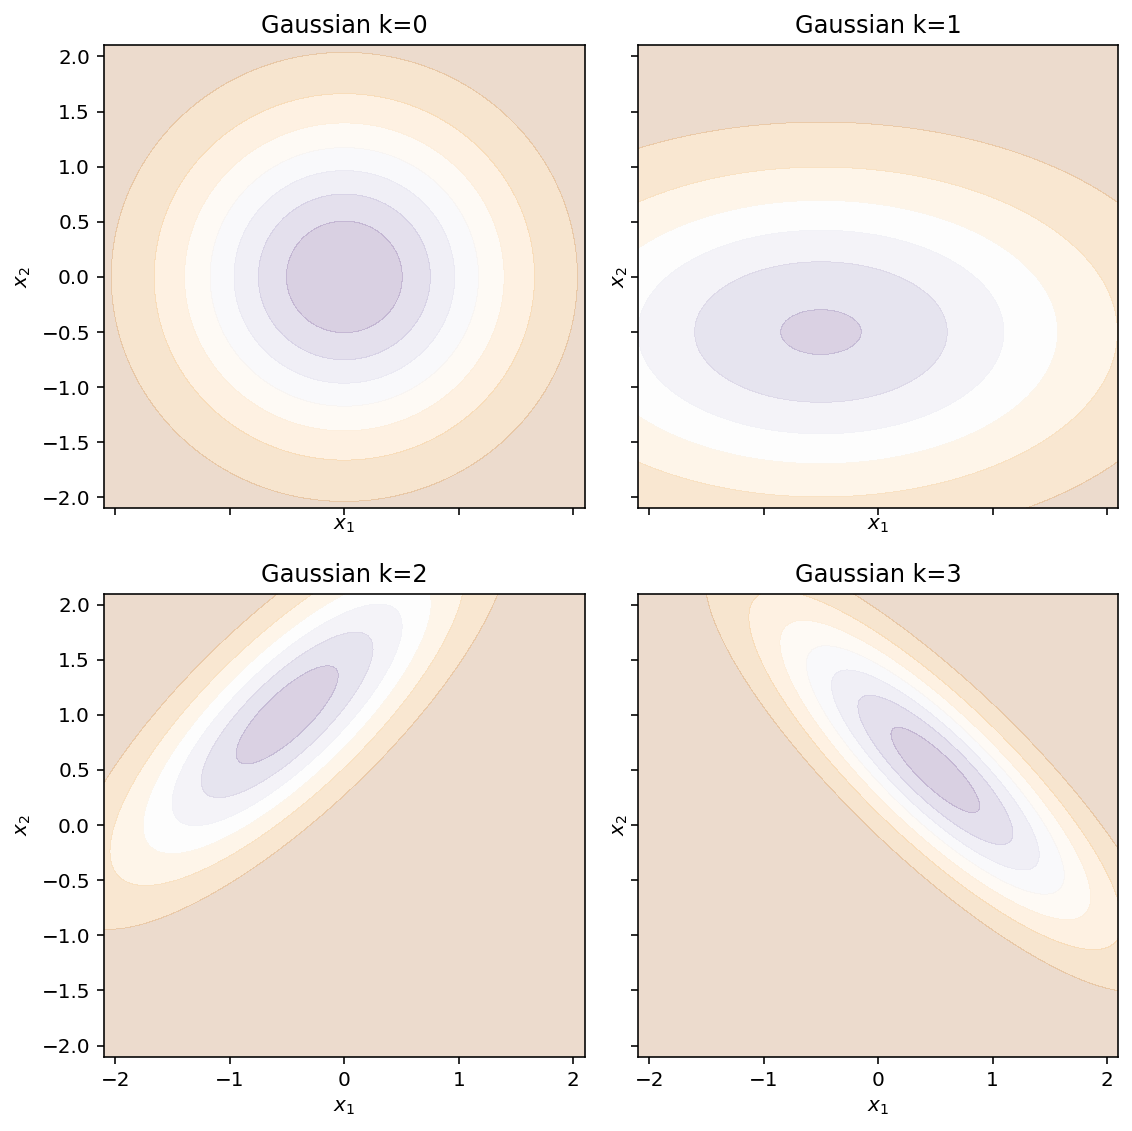

In [6]:
ncol=2
nrow=2
d_m = {0:[0,0], 1:[-.5,-.5], 2:[-.5,1], 3:[.5,.5]}
d_S = {0:np.eye(2), 1:[[3,0],[0,1]], 2:[[1,0.8],[0.8,1]], 3:[[1,-0.85],[-0.85,1]]}
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow),sharex=True, sharey=True)


kk = 0
for rr in range(nrow):
  for cc in range(ncol):
    ak = aa[rr][cc]
    draw_Gauss_2d(ak, -2,2,-2,2,d_m[kk], d_S[kk])
    ak.set_xlabel('$x_1$')
    ak.set_ylabel('$x_2$')
    ak.set_title('Gaussian k={0:d}'.format(kk))
    kk += 1

ff.tight_layout()
for kk in range(len(d_m.items())):
  print("Gaussian: {0:d}".format(kk))
  print("Mean")
  print(d_m[kk])
  print("Covariance")
  print(d_S[kk])
  print("")

## Gaussian pdf transformations
- Sum of Gaussian pdfs gives a Gaussian pdf: Consider $x_i \sim \mathcal N(m_i,\sigma_i^2)$, $i=1,\dots,n$ $n$ Gaussian random variables. Then
$$
y=\sum_{i=1}^n x_i \sim \mathcal N(m_y, \sigma_y^2)
$$ where
  - $m_y = \sum_{i=1}^n m_i$
  - if the $x_i$ are independent then $\sigma_y^2 = \sum_{i=1}^{n}\sigma_i^2$
- Scaling a Gaussian gives also a Gaussian. If $x\sim \mathcal N(m,\sigma^2)$, then
$$ y = \alpha x \sim \mathcal N(\alpha m, \alpha^2\sigma^2) $$

- Therefore **a linear combination of Gaussian pdfs is also Gaussian**.

- Consider $\mathbf X$ a 2D Gaussian random variable: 
$$
\mathbf X = \left[\begin{array}{c}x_1\\x_2\end{array}\right] \sim \mathcal N \left(\left [\begin{array}{c}0\\0\end{array}\right] , \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\right) 
$$

- Now consider another random variable $\mathbf Y$ arising from adding a constant vector to $\mathbf X$
$$
\mathbf Y = \left[\begin{array}{c}y_1\\y_2\end{array}\right] = \mathbf X + \left[\begin{array}{c}0.5\\ 0.5 \end{array}\right] 
$$
$$
\mathbf Y \sim \mathcal N \left(\left [\begin{array}{c}0.5\\0.5\end{array}\right] , \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\right)
$$

- Now consider another random variable $\mathbf Z$ arising from multiplying a constant vector to $\mathbf X$
$$
\mathbf Z = \left[\begin{array}{c}z_1\\z_2\end{array}\right] =  \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]\mathbf X
$$
$$
\mathbf Z  \sim \mathcal N \left(\left [\begin{array}{c}0\\0\end{array}\right] , \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]\left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]^\top\right)
$$

- Finally consider a random variable $\mathbf V$ arising from a linear combination of $\mathbf X$ with another Gaussian random variable $\mathbf W$
$$
\mathbf W \sim \mathcal N \left(\left [\begin{array}{c}0.5\\0.5\end{array}\right] , \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right] \right)
$$

$$
\mathbf V = \left[\begin{array}{c}v_1\\v_2\end{array}\right] = \mathbf W   + \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right] \mathbf X
$$
$$
 \mathbf V \sim \mathcal N \left(\left [\begin{array}{c}0.5\\0.5\end{array}\right] , \left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]\left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right]\left[\begin{array}{cc}1 & 0.03\\ 0.3 & 1 \end{array}\right]^\top + \left [\begin{array}{cc}1 & 0\\0& 1\end{array}\right] \right)
$$

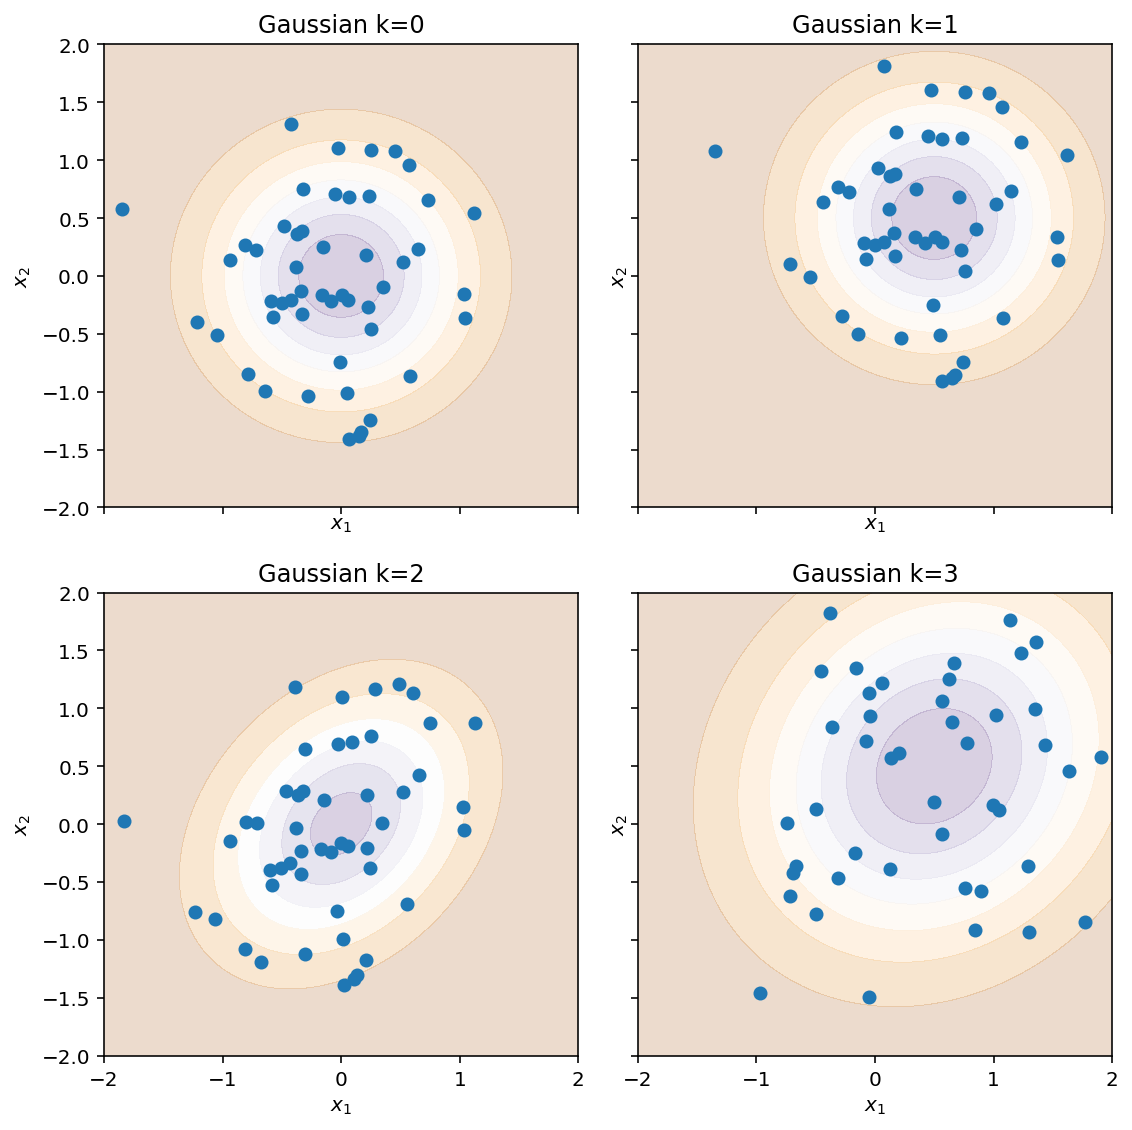

In [7]:
ncol=2
nrow=2
d_m = {0:[0,0], 1:[-.5,-.5], 2:[-.5,1], 3:[.5,.5]}
d_S = {0:np.eye(2), 1:[[3,0],[0,1]], 2:[[1,0.8],[0.8,1]], 3:[[1,-0.85],[-0.85,1]]}
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow),sharex=True, sharey=True)

lista_aa = []
for rr in range(nrow):
  for cc in range(ncol):
    lista_aa.append(aa[rr][cc])

kk = 0
ak = lista_aa[kk]
mm = d_m[0]
SS = d_S[0]*0.5
draw_Gauss_2d(ak, -2,2,-2,2, mm, SS)
rv = multivariate_normal(mm, SS)
zz = rv.rvs(size=50, random_state=42)
ak.scatter(zz[:,0], zz[:,1], marker='o')
ak.set_xlabel('$x_1$')
ak.set_ylabel('$x_2$')
ak.set_title('Gaussian k={0:d}'.format(kk))
ak.axis([-2,2,-2,2])
kk += 1

ak = lista_aa[kk]
mm = [0.5,0.5]
draw_Gauss_2d(ak, -2,2,-2,2, mm, SS)
zz1 = zz + np.array(mm)
ak.scatter(zz1[:,0], zz1[:,1], marker='o')
ak.set_xlabel('$x_1$')
ak.set_ylabel('$x_2$')
ak.set_title('Gaussian k={0:d}'.format(kk))
ak.axis([-2,2,-2,2])
kk += 1
ff.tight_layout()

ak = lista_aa[kk]
mm = d_m[0]
A=np.array([[1, 0.03],[0.3,1]])
S = A.dot(np.array(SS)).dot(A.T)
draw_Gauss_2d(ak, -2,2,-2,2, mm, S)
zz2 = zz.dot(A.T) 
ak.scatter(zz2[:,0], zz2[:,1], marker='o')
ak.set_xlabel('$x_1$')
ak.set_ylabel('$x_2$')
ak.set_title('Gaussian k={0:d}'.format(kk))
ak.axis([-2,2,-2,2])
kk += 1

ak = lista_aa[kk]
mm = [0.5,0.5]
A=np.array([[1, 0.03],[0.3,1]])
S = A.dot(np.array(SS)).dot(A.T)
draw_Gauss_2d(ak, -2,2,-2,2, mm, S+SS)
zz1 = multivariate_normal(mm, SS).rvs(size=50, random_state=42)
zz2 = multivariate_normal([0.,0.], S).rvs(size=50, random_state=44)
zz3 = zz1 + zz2  
ak.scatter(zz3[:,0], zz3[:,1], marker='o')
ak.set_xlabel('$x_1$')
ak.set_ylabel('$x_2$')
ak.set_title('Gaussian k={0:d}'.format(kk))
ak.axis([-2,2,-2,2])
kk += 1
ff.tight_layout()

## Marginals and conditionals of a multivariate Gaussian
Consider a joint multidimensional Gaussian pdf where the variables are grouped in two arrays $\mathbf x_1$ and $\mathbf x_2$
$$
f(\mathbf x|\mathbf m, \mathbf \Sigma) = \mathcal N(\mathbf x|\mathbf m, \mathbf \Sigma) = f\left( \left[ \begin{array}{c}\mathbf x_1 \\ \mathbf x_2 \end{array} \right]\right ) = \mathcal N \left( \left[\begin{array}{c}\mathbf m_1 \\ \mathbf m_2 \end{array}\right],\left[\begin{array}{cc}\Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{array}\right] \right )
$$
- **Marginal densities**
$$
f(\mathbf x_i) = \mathcal N(\mathbf m_i, \Sigma_{ii}), \quad i=1,2
$$
- **Conditional densities**
$$
f(\mathbf x_i|\mathbf x_j) = \mathcal N\left (\mathbf x_i| \mathbf m_i + \Sigma_{ij}\Sigma_{jj}^{-1}(\mathbf x_j-\mathbf m_j),\Sigma_{ii}-\Sigma_{ij}\Sigma_{jj}^{-1}\Sigma_{ji}\right)
$$

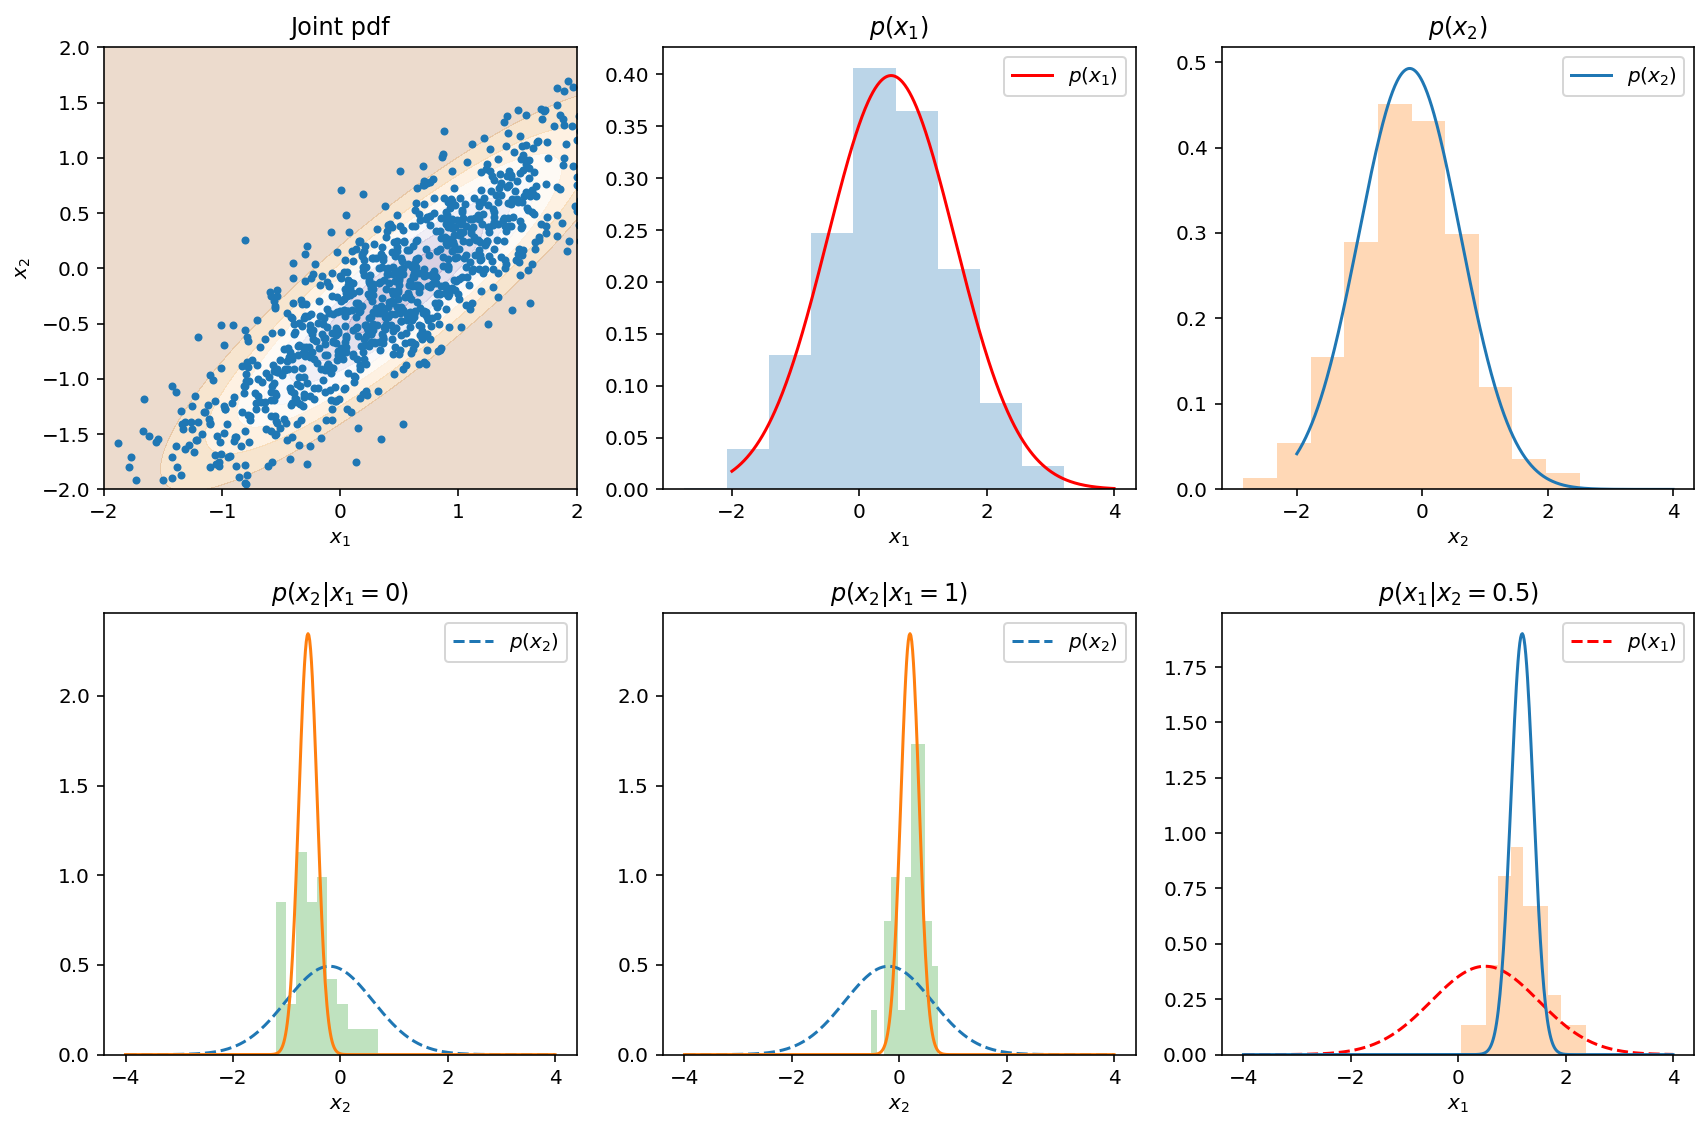

In [8]:
ncol=3
nrow=2
m = np.array([0.5,-0.2])
S = np.array([[1,0.8],[0.8,0.81]])
ff,aa = plt.subplots(nrow, ncol,figsize=(4*ncol, 4*nrow))
lista_aa = []
for rr in range(nrow):
  for cc in range(ncol):
    lista_aa.append(aa[rr][cc])

x=np.linspace(-2,4,500)

kk = 0
ak = lista_aa[kk]
draw_Gauss_2d(ak, -2,2,-2,2, m, S)
rv = multivariate_normal(m, S)
zz = rv.rvs(size=1000, random_state=42)
ak.scatter(zz[:,0], zz[:,1], marker='.')
ak.set_xlabel('$x_1$')
ak.set_ylabel('$x_2$')
ak.set_title('Joint pdf')
ak.axis([-2,2,-2,2])
kk += 1

ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[0], scale=S[0,0]), color='red', label='$p(x_1)$')
ak.hist(zz[:,0], density=True,alpha=0.3)
ak.set_title('$p(x_1)$')
ak.set_xlabel('$x_1$')
ak.legend()
kk += 1

ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[1], scale=S[1,1]), label='$p(x_2)$')
ak.hist(zz[:,1], density=True,alpha=0.3)
ak.set_title('$p(x_2)$')
ak.set_xlabel('$x_2$')
ak.legend()
kk += 1
x=np.linspace(-4,4,500)
ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[1], scale=S[1,1]), linestyle='--', label='$p(x_2)$')
ak.plot(x, norm.pdf(x, loc=m[1]-S[0,1]/S[0,0]*m[0], scale=S[1,1]-S[0,1]**2/S[0,0]))
ak.hist(zz[(-0.05<zz[:,0]) & (zz[:,0]<0.05) ,1], density=True,alpha=0.3)
ak.set_title('$p(x_2|x_1=0)$')
ak.set_xlabel('$x_2$')
ak.legend()
kk += 1
x=np.linspace(-4,4,500)
ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[1], scale=S[1,1]), linestyle='--', label='$p(x_2)$')
ak.plot(x, norm.pdf(x, loc=m[1]+S[0,1]/S[0,0]*(1-m[0]), scale=S[1,1]-S[0,1]**2/S[0,0]))
ak.hist(zz[(1-0.05<zz[:,0]) & (zz[:,0]<1+0.05) ,1], density=True,alpha=0.3)
ak.set_title('$p(x_2|x_1=1)$')
ak.set_xlabel('$x_2$')
ak.legend()
kk += 1
x=np.linspace(-4,4,500)
ak = lista_aa[kk]
ak.plot(x, norm.pdf(x, loc=m[0], scale=S[0,0]), linestyle='--', color='red', label='$p(x_1)$')
ak.plot(x, norm.pdf(x, loc=m[0]+S[0,1]/S[1,1]*(.5-m[1]), scale=S[0,0]-S[0,1]**2/S[1,1]))
ak.hist(zz[(0.5-0.05<zz[:,1]) & (zz[:,1]<0.5+0.05) ,0], density=True,alpha=0.3)
ak.set_title('$p(x_1|x_2=0.5)$')
ak.set_xlabel('$x_1$')
ak.legend()
ff.tight_layout()

# Transformation of Random Variables

In [21]:
X = np.random.uniform(size=50)

In [22]:
np.round(X,3)

array([0.024, 0.077, 0.597, 0.662, 0.805, 0.422, 0.444, 0.383, 0.652,
       0.647, 0.322, 0.14 , 0.189, 0.954, 0.708, 0.072, 0.586, 0.274,
       0.927, 0.269, 0.705, 0.104, 0.11 , 0.145, 0.148, 0.567, 0.372,
       0.434, 0.728, 0.551, 0.84 , 0.868, 0.864, 0.573, 0.98 , 0.324,
       0.676, 0.938, 0.272, 0.765, 0.934, 0.709, 0.172, 0.573, 0.309,
       0.682, 0.431, 0.357, 0.636, 0.274])

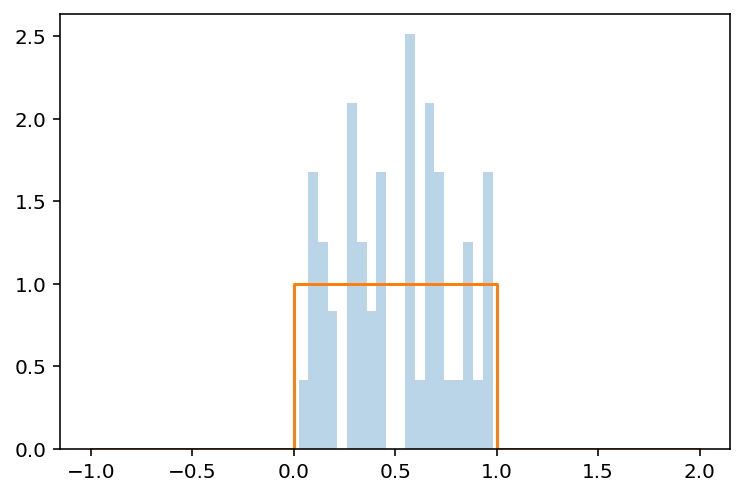

In [23]:
plt.hist(X, bins=20,density=True,alpha=0.3)
plt.plot([-1,0,0,1,1,2],[0,0,1,1,0,0])

In [24]:
#Y = np.log10(X)
#Y = np.sin(10*np.pi*X)
Y = 10*X

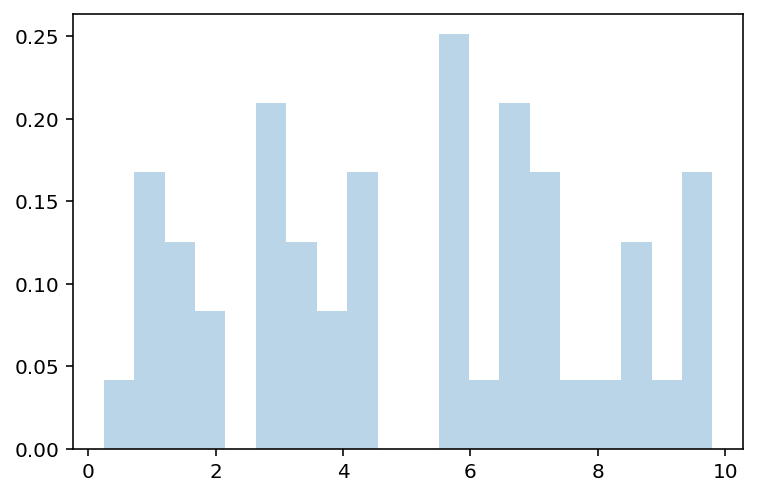

In [25]:
_=plt.hist(Y, bins=20,density=True,alpha=0.3)

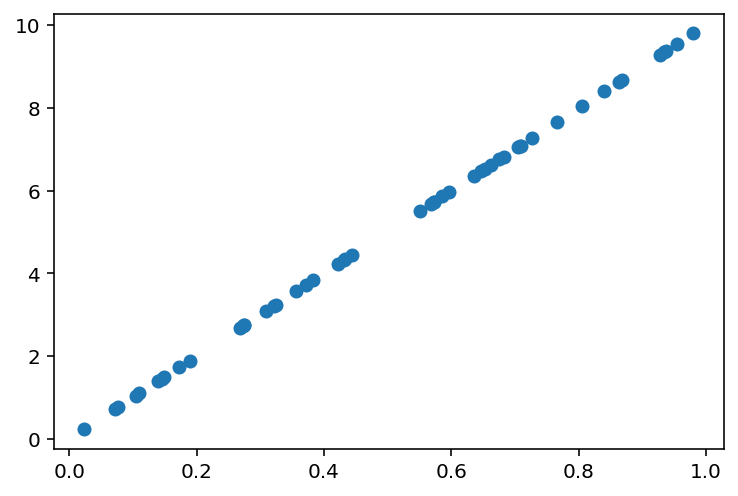

In [26]:
plt.scatter(X,Y)